In [44]:
# carga de librerías, las que hemos considerado básicas, añadid lo que queráis :)

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin_min

## Carga de ficheros

### Maestro con coordenadas

In [90]:
maestro_coord = pd.read_csv('union_todo.csv')
maestro_coord.shape

(6066, 152)

In [91]:
maestro_coord.columns

Index(['Unnamed: 0', 'cities_es', 'cities', 'province_es', 'province',
       'ccaa_es', 'ccaa', 'cities_es/province', 'provincia_original',
       'municipio_original',
       ...
       'f_construccion', 'comercio_transporte_y_hosteleria',
       'j_informacion_y_comunicaciones',
       'k_actividades_financieras_y_de_seguros', 'l_actividades_inmobiliarias',
       'actividades_profesionales_y_tecnicas',
       'educacion_sanidad_y_servicios_sociales', 'otros_servicios_personales',
       'total_servicios', 'prov_pib'],
      dtype='object', length=152)

In [29]:
maestro_coord = maestro_coord[['cities_es/province', 'latitud', 'longitud', 'provincia_original',
       'municipio_original']]

In [92]:
maestro_coord['poblacion_total'] = maestro_coord['hombres_total'] + maestro_coord['mujeres_total']

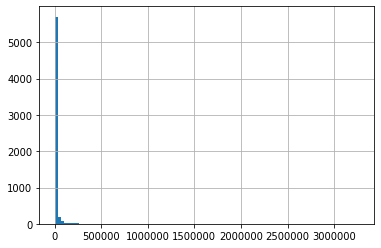

In [94]:
maestro_coord['poblacion_total'].hist(bins=100)

In [95]:
muni_menor_250 = maestro_coord[maestro_coord['poblacion_total']<250000]

### PCA

In [99]:
df_pca = pd.read_csv('union_PCA_total.csv', index_col=0)
df_pca.shape

(6066, 19)

In [100]:
df_pca.head()

,PC1_e,PC2_e,cities_es/province,PC1_c,PC2_c,PC3_c,PC4_c,PC1_d,PC2_d,PC1_g,PC2_g,PC3_g,PC1_r,PC2_r,PC3_r,PC1_tr,PC2_tr,PC1_t,PC2_t
0,-0.160765,-0.337149,alegria_dulantzi/araba,0.647078,-1.486068,0.72729,0.232404,24.930752,-0.691866,-0.128416,-0.338092,-0.506805,-0.403848,-0.616851,-0.757227,-1.732643,-0.796543,-0.345004,-0.099934
1,-0.160765,-0.337149,amurrio/araba,0.647078,-1.486068,0.72729,0.232404,0.608683,-0.026037,0.476018,-0.506285,-0.583155,-0.388877,-0.549736,-0.732898,-1.561783,-1.547514,1.319165,-1.752318
2,-0.160765,-0.337149,aramaio/araba,0.647078,-1.486068,0.72729,0.232404,-0.976419,0.053009,0.708734,-0.416839,-1.094188,-0.434298,-0.677047,-0.723399,-2.040873,1.740233,1.426462,-0.087477
3,-0.160765,-0.337149,artziniega/araba,0.647078,-1.486068,0.72729,0.232404,-0.645927,0.026926,0.643944,-0.477536,-0.745111,-0.412496,-0.620077,-0.732426,-2.040873,1.740233,0.660243,0.043856
4,-0.160765,-0.337149,arminon/araba,0.647078,-1.486068,0.72729,0.232404,-0.663376,0.048320,-0.172121,-0.345537,-0.281665,-0.797164,-0.564153,-1.002424,-2.040873,1.740233,-0.477241,0.160344


In [14]:
df_pca.describe()

,PC1_e,PC2_e,PC1_c,PC2_c,PC3_c,PC4_c,PC1_d,PC2_d,PC1_g,PC2_g,PC3_g,PC1_r,PC2_r,PC3_r,PC1_tr,PC2_tr,PC1_t,PC2_t
count,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03
mean,5.622494e-17,1.874165e-17,1.499332e-16,-5.153953e-17,2.811247e-17,9.370824e-18,-1.874165e-17,-1.171353e-17,-2.811247e-17,-1.874165e-17,9.370824e-18,2.342706e-17,1.171353e-18,-2.342706e-17,-1.874165e-16,1.077645e-16,7.028118e-17,2.951810e-16
std,3.286988e+00,9.977455e-01,2.796541e+00,1.339481e+00,1.330987e+00,1.207598e+00,6.569371e+00,6.593804e-01,1.193612e+00,1.044583e+00,9.155135e-01,1.901035e+00,1.428109e+00,1.154110e+00,3.047460e+00,1.603263e+00,2.899877e+00,1.559535e+00
min,-1.658188e-01,-2.160101e+00,-3.692296e+00,-3.214101e+00,-2.572999e+00,-2.561834e+00,-1.130462e+00,-1.355288e+01,-3.760159e+00,-2.746047e+00,-1.826384e+00,-1.311443e+00,-7.332811e+00,-1.432100e+01,-2.764580e+00,-2.881204e+00,-4.772413e-01,-2.424839e+01
25%,-1.630193e-01,-4.507345e-01,-1.264733e+00,-6.784264e-01,-9.888143e-01,-8.868088e-01,-1.075675e+00,3.875035e-02,-6.966596e-01,-7.398907e-01,-5.674998e-01,-6.100865e-01,-5.279833e-01,-4.036562e-01,-1.600100e+00,-1.412818e+00,-4.772413e-01,1.603440e-01
50%,-1.600959e-01,-3.270412e-01,-6.346646e-01,-2.136230e-02,-2.063091e-01,-7.942791e-03,-9.746443e-01,6.485492e-02,-7.339810e-02,2.267069e-01,-1.473938e-01,-3.703082e-01,-2.227532e-01,8.608306e-02,-9.013987e-01,-7.280126e-01,-4.772413e-01,1.603440e-01
75%,-1.534550e-01,-7.411045e-02,5.822933e-01,8.062054e-01,8.213542e-01,6.815108e-01,-5.818509e-01,9.326130e-02,6.784910e-01,6.618041e-01,3.801915e-01,-8.335982e-02,1.952999e-01,4.838686e-01,-9.130805e-02,1.800850e+00,-4.772413e-01,1.603440e-01
max,2.153749e+02,4.349347e+00,1.548934e+01,3.398342e+00,3.712026e+00,4.079621e+00,3.396501e+02,1.809274e+01,5.759317e+00,5.281183e+00,4.894649e+00,6.728591e+01,2.003052e+01,2.386273e+01,1.240714e+01,3.659275e+00,9.686541e+01,8.781281e+01


In [15]:
df_pca_kmeans = df_pca.drop(columns='cities_es/province')

In [87]:
print(f'kmeans con {len(df_pca_kmeans.columns)} variables')
df_pca_kmeans.columns

kmeans con 18 variables


Index(['PC1_e', 'PC2_e', 'PC1_c', 'PC2_c', 'PC3_c', 'PC4_c', 'PC1_d', 'PC2_d',
       'PC1_g', 'PC2_g', 'PC3_g', 'PC1_r', 'PC2_r', 'PC3_r', 'PC1_tr',
       'PC2_tr', 'PC1_t', 'PC2_t'],
      dtype='object')

### Elbow Curve

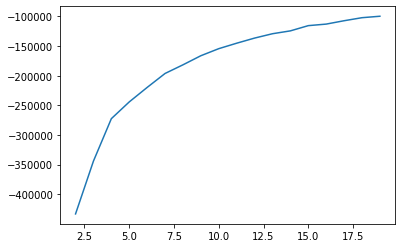

In [19]:
scores = []
k_values = range(2, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k).fit(df_pca_kmeans)
    score = kmeans.score(df_pca_kmeans)
    scores.append(score)
sns.lineplot(x=k_values, y=scores)

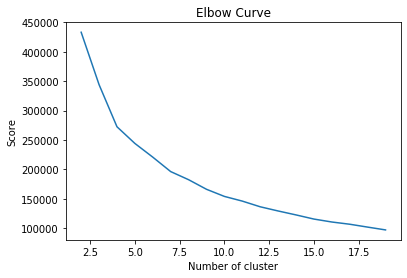

In [39]:
sse = {}
k_values = range(2, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_pca_kmeans)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Score")
plt.title('Elbow Curve')
plt.show()

### Kmeans

In [88]:
# Aprender Kmeans con el valor de K obtenido
kmeans = KMeans(n_clusters=9).fit(df_pca_kmeans)
centroids = kmeans.cluster_centers_
df_pca['cluster'] = kmeans.labels_

In [89]:
df_pca['cluster'].value_counts()

1    3321
5    2203
0     250
2     149
7      75
8      52
4      14
3       1
6       1
Name: cluster, dtype: int64

In [79]:
df_pca[df_pca['cluster']==1]

,PC1_e,PC2_e,cities_es/province,PC1_c,PC2_c,PC3_c,PC4_c,PC1_d,PC2_d,PC1_g,PC2_g,PC3_g,PC1_r,PC2_r,PC3_r,PC1_tr,PC2_tr,PC1_t,PC2_t,cluster
2991,73.804313,3.001111,madrid/madrid,15.489338,0.00478,-0.142396,-1.665439,339.650057,18.092745,0.462494,0.314043,-0.853364,67.285915,3.756164,23.862734,12.407139,-0.755188,-0.212952,0.600745,1


In [80]:
df_pca[df_pca['cluster']==4]

,PC1_e,PC2_e,cities_es/province,PC1_c,PC2_c,PC3_c,PC4_c,PC1_d,PC2_d,PC1_g,PC2_g,PC3_g,PC1_r,PC2_r,PC3_r,PC1_tr,PC2_tr,PC1_t,PC2_t,cluster
717,215.374918,-2.160101,barcelona/barcelona,0.91606,2.448996,0.660793,1.590635,171.163445,14.52498,1.808184,-1.843352,-0.666936,51.195278,-1.9381,14.275072,9.685639,-1.912037,0.033992,-0.148194,4


In [81]:
df_pca[df_pca['cluster']==2]

,PC1_e,PC2_e,cities_es/province,PC1_c,PC2_c,PC3_c,PC4_c,PC1_d,PC2_d,PC1_g,PC2_g,PC3_g,PC1_r,PC2_r,PC3_r,PC1_tr,PC2_tr,PC1_t,PC2_t,cluster
129,35.497742,-0.558755,alicante/alicante,-1.170706,-0.575468,-1.276992,0.569053,80.913139,-11.411314,1.953602,-0.918938,-0.370615,8.454358,0.180017,4.428505,1.944584,-2.270112,33.631153,2.854939,2
246,-0.151154,0.079311,cartagena/murcia,1.126564,2.340228,-2.572999,0.015246,72.232281,-13.552885,1.193800,-0.844985,0.557831,11.612178,-2.422449,8.096990,1.826283,-1.525727,3.497414,-3.248687,2
253,-0.151154,0.079311,lorca/murcia,1.126564,2.340228,-2.572999,0.015246,56.796229,-10.494414,0.696039,-0.372546,0.365621,7.121630,-1.739872,5.044321,2.050801,-1.468611,33.504304,-9.606349,2
259,9.188630,-0.014356,murcia/murcia,1.126564,2.340228,-2.572999,0.015246,52.519576,-10.596388,2.041246,-0.670859,-0.510738,25.412525,-7.332811,2.694115,1.923274,-1.170617,50.152405,10.523721,2
643,15.681486,-0.142228,palma/illes_balears,-3.692296,-1.743009,0.496517,-2.561834,43.257845,-7.028379,1.742639,-1.858025,-0.142738,10.738651,-0.792989,10.201391,0.505447,2.113721,-0.293446,0.083439,2
3719,8.441622,-0.063566,malaga/malaga,-0.958911,2.132128,-1.061740,-0.274573,71.918555,-12.941032,1.738405,0.227076,-0.178326,19.742805,-0.369400,9.730263,1.696204,-2.282738,96.865408,87.812811,2
3730,-0.151632,0.058613,cuevas_del_becerro/malaga,-0.958911,2.132128,-1.061740,-0.274573,58.219568,-9.148086,-0.169164,0.892287,0.359627,-0.560530,-0.581152,0.291495,0.962321,2.131726,-0.477241,0.160344,2
4085,-0.153532,-0.023695,la_joyosa/zaragoza,-0.140923,2.738013,-1.436772,0.491810,68.902610,1.721586,-0.139791,-1.099612,0.642079,-0.436409,0.397925,-0.273466,0.093913,-2.059466,-0.477241,0.160344,2
4147,-0.153532,-0.023695,ricla/zaragoza,-0.140923,2.738013,-1.436772,0.491810,69.075344,1.714695,-0.757848,-0.853180,0.952676,-0.044295,0.281690,-0.093270,-0.140448,-0.628770,-0.477241,0.160344,2
4188,0.720667,-0.023435,zaragoza/zaragoza,-0.140923,2.738013,-1.436772,0.491810,68.798483,1.737461,-0.139791,-1.099612,0.642079,21.387395,-2.248914,8.745138,0.221440,-2.357460,0.033992,-0.148194,2


In [82]:
#vemos el representante del grupo, el municipio cercano a su centroide
closest, _ = pairwise_distances_argmin_min(centroids, df_pca_kmeans)
print(closest)
municipios=df_pca['cities_es/province'].values
for row in closest:
    print(municipios[row])

[ 298 2991  253 2979  717  945 4425]
canjayar/almeria
madrid/madrid
lorca/murcia
galapagar/madrid
barcelona/barcelona
viladecavalls/barcelona
pontevedra/pontevedra


### Union con el fichero con coordenadas

In [83]:
df_kmeans_all = pd.merge(df_pca, maestro_coord, on='cities_es/province', how='inner')

In [84]:
df_kmeans_all.head()

,PC1_e,PC2_e,cities_es/province,PC1_c,PC2_c,PC3_c,PC4_c,PC1_d,PC2_d,PC1_g,...,PC3_r,PC1_tr,PC2_tr,PC1_t,PC2_t,cluster,latitud,longitud,provincia_original,municipio_original
0,-0.160765,-0.337149,alegria_dulantzi/araba,0.647078,-1.486068,0.72729,0.232404,24.930752,-0.691866,-0.128416,...,-0.757227,-1.732643,-0.796543,-0.345004,-0.099934,6,42.84149,-2.513507,Araba/Álava,Alegría-Dulantzi
1,-0.160765,-0.337149,amurrio/araba,0.647078,-1.486068,0.72729,0.232404,0.608683,-0.026037,0.476018,...,-0.732898,-1.561783,-1.547514,1.319165,-1.752318,0,43.05265,-3.001022,Araba/Álava,Amurrio
2,-0.160765,-0.337149,aramaio/araba,0.647078,-1.486068,0.72729,0.232404,-0.976419,0.053009,0.708734,...,-0.723399,-2.040873,1.740233,1.426462,-0.087477,0,43.05400,-2.566000,Araba/Álava,Aramaio
3,-0.160765,-0.337149,artziniega/araba,0.647078,-1.486068,0.72729,0.232404,-0.645927,0.026926,0.643944,...,-0.732426,-2.040873,1.740233,0.660243,0.043856,0,43.12220,-3.128209,Araba/Álava,Artziniega
4,-0.160765,-0.337149,arminon/araba,0.647078,-1.486068,0.72729,0.232404,-0.663376,0.048320,-0.172121,...,-1.002424,-2.040873,1.740233,-0.477241,0.160344,0,42.72305,-2.872574,Araba/Álava,Armiñón


In [85]:
df_kmeans_all.to_csv("df_kmeans.csv")

# Filtrado de municipios < 250K

In [101]:
df_pca_filtrado = pd.merge(df_pca, muni_menor_250['cities_es/province'], on='cities_es/province', how='inner')

In [102]:
df_pca_kmeans = df_pca_filtrado.drop(columns='cities_es/province')

In [103]:
print(f'kmeans con {len(df_pca_kmeans.columns)} variables')
df_pca_kmeans.columns

kmeans con 18 variables


Index(['PC1_e', 'PC2_e', 'PC1_c', 'PC2_c', 'PC3_c', 'PC4_c', 'PC1_d', 'PC2_d',
       'PC1_g', 'PC2_g', 'PC3_g', 'PC1_r', 'PC2_r', 'PC3_r', 'PC1_tr',
       'PC2_tr', 'PC1_t', 'PC2_t'],
      dtype='object')

### Elbow Curve

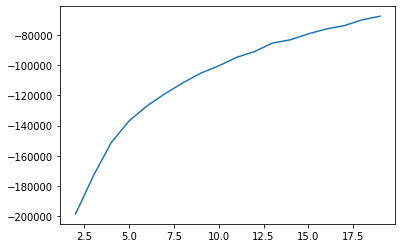

In [104]:
scores = []
k_values = range(2, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k).fit(df_pca_kmeans)
    score = kmeans.score(df_pca_kmeans)
    scores.append(score)
sns.lineplot(x=k_values, y=scores)

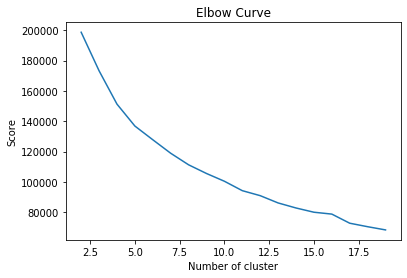

In [105]:
sse = {}
k_values = range(2, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_pca_kmeans)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Score")
plt.title('Elbow Curve')
plt.show()

### Kmeans

In [118]:
# Aprender Kmeans con el valor de K obtenido
kmeans = KMeans(n_clusters=7).fit(df_pca_kmeans)
centroids = kmeans.cluster_centers_
df_pca_filtrado['cluster'] = kmeans.labels_

In [119]:
df_pca_filtrado['cluster'].value_counts()

3    2164
1    1711
0    1576
5     246
2     149
4      94
6      86
Name: cluster, dtype: int64

In [120]:
#vemos el representante del grupo, el municipio cercano a su centroide
closest, _ = pairwise_distances_argmin_min(centroids, df_pca_kmeans)
print(closest)
municipios=df_pca_filtrado['cities_es/province'].values
for row in closest:
    print(municipios[row])

[  62  267 2961  310 1048  779 3381]
fuente_alamo/albacete
alboloduy/almeria
galapagar/madrid
laujar_de_andarax/almeria
reus/tarragona
llinars_del_valles/barcelona
linares/jaen


### Union con el fichero con coordenadas

In [121]:
df_kmeans_filtrado = pd.merge(df_pca_filtrado, maestro_coord, on='cities_es/province', how='inner')

In [122]:
df_kmeans_filtrado.head()

,PC1_e,PC2_e,cities_es/province,PC1_c,PC2_c,PC3_c,PC4_c,PC1_d,PC2_d,PC1_g,...,comercio_transporte_y_hosteleria,j_informacion_y_comunicaciones,k_actividades_financieras_y_de_seguros,l_actividades_inmobiliarias,actividades_profesionales_y_tecnicas,educacion_sanidad_y_servicios_sociales,otros_servicios_personales,total_servicios,prov_pib,poblacion_total
0,-0.160765,-0.337149,amurrio/araba,0.647078,-1.486068,0.72729,0.232404,0.608683,-0.026037,0.476018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11983377,16997.0
1,-0.160765,-0.337149,aramaio/araba,0.647078,-1.486068,0.72729,0.232404,-0.976419,0.053009,0.708734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11983377,1467.0
2,-0.160765,-0.337149,artziniega/araba,0.647078,-1.486068,0.72729,0.232404,-0.645927,0.026926,0.643944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11983377,4795.0
3,-0.160765,-0.337149,arminon/araba,0.647078,-1.486068,0.72729,0.232404,-0.663376,0.048320,-0.172121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11983377,4575.0
4,-0.160765,-0.337149,asparrena/araba,0.647078,-1.486068,0.72729,0.232404,-0.778389,0.067232,-0.245304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11983377,3395.0


In [123]:
df_kmeans_filtrado.to_csv("df_kmeans_filtrado.csv")